In [121]:

# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

In [122]:
DATA_PATH = "fever.csv"
data = pd.read_csv(DATA_PATH)

In [123]:

# Replace 'M' with 1 and 'F' with 2 in the 'Sex' column
data['Sex'] = data['Sex'].replace({'M': 1, 'F': 2})

data.head()

,Subject ID,Sex,Age (in months),Weight (in kilograms),Height (in meter ),Body Mass Index (BMI),"Presence of Fever (binary: 1 for present, 0 for absent)",Platelet Count (blood platelets per microliter),Hematocrit Level (percentage of red blood cells),White Blood Cell Count (per microliter),...,"Presence of Skin Rash (binary: 1 for present, 0 for absent)","Presence of Severe Headache (binary: 1 for present, 0 for absent)","Presence of Abdominal Pain (binary: 1 for present, 0 for absent)","Presence of Vomiting (binary: 1 for present, 0 for absent)","Presence of Bleeding (binary: 1 for present, 0 for absent)","Dengue NS1 Antigen Test Result (binary: 1 for positive, 0 for negative)","Dengue IgM Antibody Test Result (binary: 1 for positive, 0 for negative)","Dengue IgG Antibody Test Result (binary: 1 for positive, 0 for negative)","Hospitalization (binary: 1 for yes, 0 for no)","Target (binary: 1 for yes, 0 for no)"
0,DEN_0001,1,36,14,NaN,NaN,1,20000,40,6000,...,0,1,1,1,0,0,1,1,1,1
1,DEN_0002,1,48,15,NaN,NaN,1,18000,38,5500,...,0,0,0,1,0,1,0,0,1,1
2,DEN_0003,2,24,12,NaN,NaN,1,13000,45,6300,...,0,1,0,1,0,1,0,0,1,1
3,DEN_0004,1,13,8,NaN,NaN,1,35000,29,7025,...,0,1,0,0,1,1,0,0,1,1
4,DEN_0005,2,19,10,NaN,NaN,1,50000,35,2622,...,0,0,1,1,0,0,0,0,1,0


In [124]:
# data.shape

In [125]:
data.isnull().values.any()

True

In [126]:
data.isna().sum()

Subject ID                                                                    0
Sex                                                                           0
Age (in months)                                                               0
Weight (in kilograms)                                                         0
Height (in meter )                                                          100
Body Mass Index (BMI)                                                       100
Presence of Fever (binary: 1 for present, 0 for absent)                       0
Platelet Count (blood platelets per microliter)                               0
Hematocrit Level (percentage of red blood cells)                              0
White Blood Cell Count (per microliter)                                       0
Presence of Joint Pain (binary: 1 for present, 0 for absent)                  0
Presence of Skin Rash (binary: 1 for present, 0 for absent)                   0
Presence of Severe Headache (binary: 1 f

In [127]:
data['Target  (binary: 1 for yes, 0 for no)'].value_counts()

Target  (binary: 1 for yes, 0 for no)
1    72
0    28
Name: count, dtype: int64

c:\Users\Joy's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Joy's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Joy's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Joy's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='Sex', ylabel='count'>

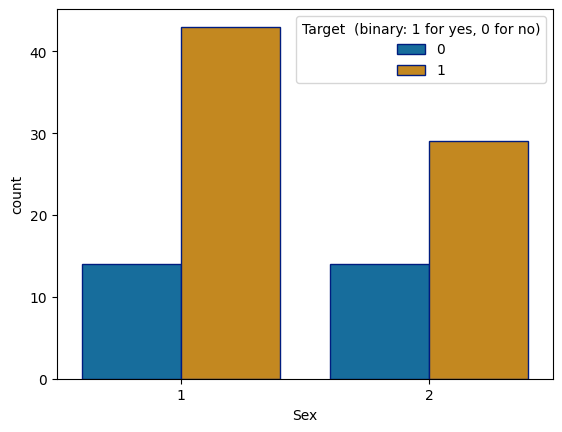

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.countplot(data['Target  (binary: 1 for yes, 0 for no)'])
# plt.plot(data['Target  (binary: 1 for yes, 0 for no)'])

# # Add labels and title
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Column Plot Example')

# Show the plot
# plt.show()

sns.countplot(x='Sex', hue='Target  (binary: 1 for yes, 0 for no)', data=data, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

In [129]:
data['age_year'] = (data['Age (in months)'] / 12).round()

In [130]:
data['age_year']

0      3.0
1      4.0
2      2.0
3      1.0
4      2.0
      ... 
95     7.0
96    12.0
97    10.0
98     9.0
99     9.0
Name: age_year, Length: 100, dtype: float64

c:\Users\Joy's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Joy's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Joy's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Joy's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='age_year', ylabel='count'>

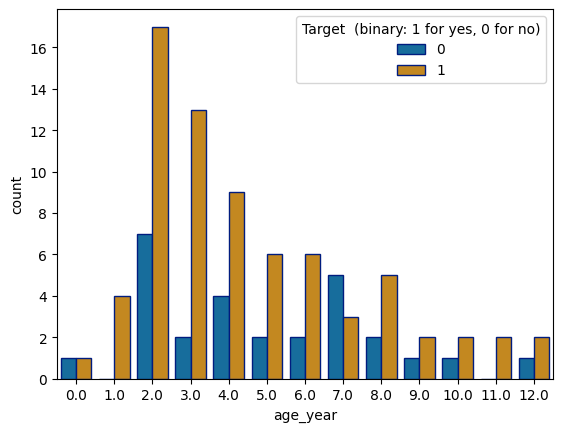

In [131]:
sns.countplot(x='age_year', hue='Target  (binary: 1 for yes, 0 for no)', data=data, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

In [132]:
data = data.drop('Subject ID', axis=1)
data = data.drop('Height (in meter )', axis=1)
data = data.drop('Body Mass Index (BMI)', axis=1)
data = data.drop('age_year', axis=1)

data.isnull().any()

Sex                                                                         False
Age (in months)                                                             False
Weight (in kilograms)                                                       False
Presence of Fever (binary: 1 for present, 0 for absent)                     False
Platelet Count (blood platelets per microliter)                             False
Hematocrit Level (percentage of red blood cells)                            False
White Blood Cell Count (per microliter)                                     False
Presence of Joint Pain (binary: 1 for present, 0 for absent)                False
Presence of Skin Rash (binary: 1 for present, 0 for absent)                 False
Presence of Severe Headache (binary: 1 for present, 0 for absent)           False
Presence of Abdominal Pain (binary: 1 for present, 0 for absent)            False
Presence of Vomiting (binary: 1 for present, 0 for absent)                  False
Presence of Blee

In [133]:
x = data.iloc[:,:-1]
x

,Sex,Age (in months),Weight (in kilograms),"Presence of Fever (binary: 1 for present, 0 for absent)",Platelet Count (blood platelets per microliter),Hematocrit Level (percentage of red blood cells),White Blood Cell Count (per microliter),"Presence of Joint Pain (binary: 1 for present, 0 for absent)","Presence of Skin Rash (binary: 1 for present, 0 for absent)","Presence of Severe Headache (binary: 1 for present, 0 for absent)","Presence of Abdominal Pain (binary: 1 for present, 0 for absent)","Presence of Vomiting (binary: 1 for present, 0 for absent)","Presence of Bleeding (binary: 1 for present, 0 for absent)","Dengue NS1 Antigen Test Result (binary: 1 for positive, 0 for negative)","Dengue IgM Antibody Test Result (binary: 1 for positive, 0 for negative)","Dengue IgG Antibody Test Result (binary: 1 for positive, 0 for negative)","Hospitalization (binary: 1 for yes, 0 for no)"
0,1,36,14,1,20000,40,6000,1,0,1,1,1,0,0,1,1,1
1,1,48,15,1,18000,38,5500,0,0,0,0,1,0,1,0,0,1
2,2,24,12,1,13000,45,6300,1,0,1,0,1,0,1,0,0,1
3,1,13,8,1,35000,29,7025,0,0,1,0,0,1,1,0,0,1
4,2,19,10,1,50000,35,2622,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,82,21,1,14000,33,4500,0,1,1,0,1,0,0,0,0,1
96,1,144,26,1,11000,39,6500,0,0,1,0,1,0,0,0,0,1
97,2,125,24,1,5000,40,4500,0,0,1,0,1,0,0,0,0,1
98,1,111,22,1,8000,43,6500,1,0,1,1,1,0,0,0,0,1


In [134]:
y = data.iloc[:,17]
y

0     1
1     1
2     1
3     1
4     0
     ..
95    1
96    1
97    0
98    1
99    1
Name: Target  (binary: 1 for yes, 0 for no), Length: 100, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split, cross_val_score


In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=1)
x_train


,Sex,Age (in months),Weight (in kilograms),"Presence of Fever (binary: 1 for present, 0 for absent)",Platelet Count (blood platelets per microliter),Hematocrit Level (percentage of red blood cells),White Blood Cell Count (per microliter),"Presence of Joint Pain (binary: 1 for present, 0 for absent)","Presence of Skin Rash (binary: 1 for present, 0 for absent)","Presence of Severe Headache (binary: 1 for present, 0 for absent)","Presence of Abdominal Pain (binary: 1 for present, 0 for absent)","Presence of Vomiting (binary: 1 for present, 0 for absent)","Presence of Bleeding (binary: 1 for present, 0 for absent)","Dengue NS1 Antigen Test Result (binary: 1 for positive, 0 for negative)","Dengue IgM Antibody Test Result (binary: 1 for positive, 0 for negative)","Dengue IgG Antibody Test Result (binary: 1 for positive, 0 for negative)","Hospitalization (binary: 1 for yes, 0 for no)"
2,2,24,12,1,13000,45,6300,1,0,1,0,1,0,1,0,0,1
73,2,65,19,1,39000,36,1400,0,0,1,0,1,1,1,0,0,0
97,2,125,24,1,5000,40,4500,0,0,1,0,1,0,0,0,0,1
62,1,51,16,1,47000,36,1400,0,0,1,0,1,1,1,1,0,1
19,2,32,15,1,21000,40,4500,0,1,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,36,20,1,21000,38,3400,0,0,1,0,1,0,0,0,0,0
9,2,48,14,0,50000,35,7000,0,0,1,0,0,0,0,0,0,0
72,2,38,16,1,27000,37,1500,0,0,0,1,0,0,0,0,0,0
12,1,50,14,1,35000,25,2000,0,0,1,0,0,1,0,0,0,1


In [137]:
x_test

,Sex,Age (in months),Weight (in kilograms),"Presence of Fever (binary: 1 for present, 0 for absent)",Platelet Count (blood platelets per microliter),Hematocrit Level (percentage of red blood cells),White Blood Cell Count (per microliter),"Presence of Joint Pain (binary: 1 for present, 0 for absent)","Presence of Skin Rash (binary: 1 for present, 0 for absent)","Presence of Severe Headache (binary: 1 for present, 0 for absent)","Presence of Abdominal Pain (binary: 1 for present, 0 for absent)","Presence of Vomiting (binary: 1 for present, 0 for absent)","Presence of Bleeding (binary: 1 for present, 0 for absent)","Dengue NS1 Antigen Test Result (binary: 1 for positive, 0 for negative)","Dengue IgM Antibody Test Result (binary: 1 for positive, 0 for negative)","Dengue IgG Antibody Test Result (binary: 1 for positive, 0 for negative)","Hospitalization (binary: 1 for yes, 0 for no)"
80,2,45,17,1,26000,12,1500,1,0,0,0,1,0,0,0,0,1
84,1,26,11,1,18000,33,5600,1,0,0,0,1,1,0,0,0,1
33,1,27,17,1,19000,26,1200,0,0,0,1,0,1,1,1,0,0
81,1,83,21,1,33000,15,3600,0,0,1,0,1,1,0,1,0,0
93,1,44,16,0,95000,17,3200,0,0,1,0,1,1,0,0,0,1
17,1,25,13,1,18000,32,7000,0,0,0,1,1,1,0,0,0,0
36,2,71,18,1,25000,24,3500,0,0,1,1,0,0,1,0,0,1
82,1,94,24,1,31000,31,3900,0,0,1,1,1,0,1,0,0,1
69,1,25,12,1,13000,29,7500,0,0,1,0,1,1,1,0,0,1
65,2,42,18,1,10000,25,4400,0,0,1,0,1,1,0,0,0,1


In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Rclf = RandomForestClassifier()
Rclf.fit(x_train, y_train)

Dclf = DecisionTreeClassifier()
Dclf.fit(x_train, y_train)

DecisionTreeClassifier()

In [139]:
print("Accuracy With Random Forest")
Rclf.score(x_test, y_test)


Accuracy With Random Forest


0.65

In [140]:
print("Accuracy With Decision Tree")
Dclf.score(x_test, y_test)

Accuracy With Decision Tree


0.35